In [1]:
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
images = []
labels = []

In [4]:
data_path = ".\\dataset\\cifar-10-batches-py\\"

In [5]:
for i in range(1, 6):
    batch = unpickle(os.path.join(data_path, f"data_batch_{i}"))
    images.append(batch[b'data'])
    labels.append(batch[b'labels'])

In [6]:
train_images = np.vstack(images).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print(train_images.shape)
print(len(labels[1]))

(50000, 32, 32, 3)
10000


In [7]:
the_label = np.hstack(labels).reshape(50000, 1)
print(the_label.shape)

(50000, 1)


In [8]:
test_batch = unpickle(os.path.join(data_path, f"test_batch"))
test_image = test_batch[b'data']
test_label = test_batch[b'labels']
test = test_image.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [9]:
test.shape
print(len(test_label))

10000


In [10]:
the_image = train_images[64]
the_image = the_image[:, :, 0]
the_image.shape

(32, 32)

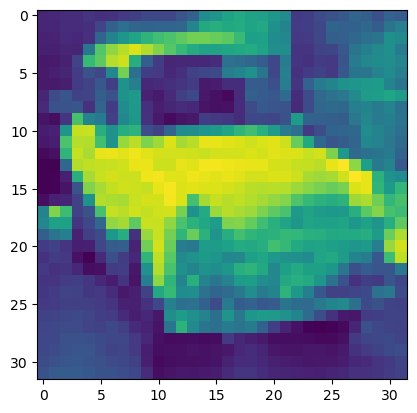

In [11]:
plt.imshow(the_image)
plt.show()

In [12]:
# convs1 = np.random.randint(2, size=(2, 1, 3, 3))
# convs2 = np.random.randint(2, size=(4, 2, 3, 3))
# bias1 = np.zeros(2)
# bias2 = np.zeros(4)
# print(convs1)
# print()
# print(convs2)

In [13]:
# convs1 = np.array(
#     [
#         [
#             [[1, 1, 0],
#              [0, 0, 0],
#              [0, 1, 1]]
#         ],
#         [
#             [[1, 1, 0],
#              [1, 0, 0],
#              [1, 1, 0]]
#         ]
#     ],
# )
# convs2 = np.array(
#     [
#         [
#             [[1, 0, 0],
#              [0, 1, 0],
#              [1, 0, 1]],

#             [[1, 1, 0],
#              [1, 1, 1],
#              [1, 1, 0]],
#         ],
#         [
#             [[1, 0, 1],
#              [0, 0, 1],
#              [0, 1, 0]],
#             [[1, 1, 1],
#              [0, 0, 0],
#              [0, 1, 1]]
#         ],
#         [
#             [[1, 0, 1],
#              [0, 0, 1],
#              [1, 1, 1]],
#             [[0, 0, 0],
#              [0, 0, 0],
#              [0, 0, 0]]
#         ],
#         [
#             [[1, 1, 0],
#              [0, 0, 0],
#              [1, 0, 1]],
#             [[1, 1, 0],
#              [0, 1, 1],
#              [0, 1, 1]]
#         ]
#     ]
# )

# print(convs1.shape)
# print(convs2.shape)

In [17]:
# convs1 = np.random.rand(2, 1, 3, 3)*0.01
# bias1 = np.zeros(2)
# convs2 = np.random.rand(4, 2, 3, 3)*0.01
# bias2 = np.zeros(4)
# print(convs1)
# print(convs2)
# print(bias1)
# print(bias2)

In [19]:
convs1 = np.array(
    [
        [
            [[0.00328364, 0.00046651, 0.00239101],
             [0.0031846,  0.00522945, 0.00504424],
             [0.00656692, 0.00797387, 0.00094572]]
        ],
        [
            [[0.00797592, 0.00631291, 0.0033623],
             [0.00250088, 0.00891176, 0.00581687],
             [0.00331829, 0.00605359, 0.00339134]]
        ],
    ])

convs2 = np.array(
    [
        [
            [[0.00895433, 0.00077189, 0.00134878],
             [0.0024303,  0.00128332, 0.00385131],
             [0.00030218, 0.00822385, 0.0041281 ]],
            [[0.00330197, 0.00191346, 0.00780884],
             [0.00504102, 0.00311831, 0.00084845],
             [0.0042936,  0.0004314,  0.00322003]]
        ],
        [
            [[0.00611116, 0.00969479, 0.00433376],
             [0.00497096, 0.00378853, 0.00957198],
             [0.00069666, 0.00522063, 0.00165166]],
            [[0.00820643, 0.00017181, 0.00121214],
             [0.00166301, 0.00039936, 0.00269654],
             [0.00391191, 0.00306065, 0.00771255]]
        ],
        [
            [[0.00045499, 0.00068764, 0.00229433],
             [0.00027335, 0.00095961, 0.00598458],
             [0.00600151, 0.00034938, 0.00494806]],
            [[0.00858401, 0.0092831, 0.00198257],
             [0.00936511, 0.00155508, 0.00791489],
             [0.00046979, 0.00483815, 0.0068774 ]]
        ],
        [
            [[0.00338009, 0.00940353, 0.00900636],
             [0.00713607, 0.00445887, 0.00500987],
             [0.00164991, 0.00979389, 0.00952612]],
            [[0.00379532, 0.00633353, 0.00105769],
             [0.00736161, 0.00213996, 0.0033809],
             [0.00740902, 0.00608547, 0.00291607]]
        ]
    ]
)
print(convs1.shape)
print(convs2.shape)

(2, 1, 3, 3)
(4, 2, 3, 3)


In [20]:
bias1 = np.array([0., 0.])
bias2 = np.array([0., 0., 0., 0.])

print(bias1.shape)
print(bias2.shape)

(2,)
(4,)


### The shapes are of shape (2, 1, 3, 3) indicating two filters of shape (1, 3, 3) and (4, 2, 3, 3) indicating four filters of shape (2, 3, 3). The 1 in front of the three dimensions represent the depth of the filters used.

In [21]:
for i in range(2):
    for j in range(1):
        for k in range(3):
            for l in range(3):
                print(convs1[i][j][k][l], end='')
            print('')
        print('')

0.003283640.000466510.00239101
0.00318460.005229450.00504424
0.006566920.007973870.00094572

0.007975920.006312910.0033623
0.002500880.008911760.00581687
0.003318290.006053590.00339134



In [22]:
print(the_image)

[[ 65  67  69 ...  93 108 102]
 [ 65  65  69 ... 104 122 132]
 [ 62  63  68 ... 122 146 140]
 ...
 [ 88  90  95 ...  83  89  92]
 [ 90  94  98 ...  75  78  85]
 [ 95 102 104 ...  74  79  84]]


In [23]:
print(the_image[1][2])

69


In [24]:
the_image[0][5]

np.uint8(71)

In [25]:
the_image = the_image.reshape(1, 32, 32)
print(the_image.shape)

(1, 32, 32)


In [26]:
feature_map = np.zeros((2, 30, 30))
# the shape is 30,30 because the new feature map's shape will be 30,30

#for layer 1
for k in range(2):#means there are 2 Conv filters here
    for l in range(1):#denotes the depth of the filter
        for i in range(30):#along the x-axis
            for j in range(30):#along the y-axis
                feature_map[k][i][j] = (the_image[l][i][j]*convs1[k][l][0][0] + the_image[l][i][j+1]*convs1[k][l][0][1] + the_image[l][i][j+2]*convs1[k][l][0][2]) + (the_image[l][i+1][j]*convs1[k][l][1][0] + the_image[l][i+1][j+1]*convs1[k][l][1][1] + the_image[l][i+1][j+2]*convs1[k][l][1][2]) + (the_image[l][i+2][j]*convs1[k][l][2][0] + the_image[l][i+2][j+1]*convs1[k][l][2][1] + the_image[l][i+2][j+2]*convs1[k][l][2][2]) + bias1[k]
                # print(f'(the_image[{l}][{i}][{j}]*convs1[{k}][{l}][0][0] + the_image[{l}][{i}][{j+1}]*convs1[{k}][{l}][0][1] + the_image[{l}][{i}][{j+2}]*convs1[{k}][{l}][0][2]) + (the_image[{l}][{i+1}][{j}]*convs1[{k}][{l}][1][0] + the_image[{l}][{i+1}][{j+1}]*convs1[{k}][{l}][1][1] + the_image[{l}][{i+1}][{j+2}]*convs1[{k}][{l}][1][2]) + (the_image[{l}][{i+2}][{j}]*convs1[{k}][{l}][2][0] + the_image[{l}][{i+2}][{j+1}]*convs1[{k}][{l}][2][1] + the_image[{l}][{i+2}][{j+2}]*convs1[{k}][{l}][2][2])')
                # print(f"({the_image[l][i][j]}*{convs1[k][l][0][0]} + {the_image[l][i][j+1]}*{convs1[k][l][0][1]} + {the_image[l][i][j+2]}*{convs1[k][l][0][2]}) + ({the_image[l][i+1][j]}*{convs1[k][l][1][0]} + {the_image[l][i+1][j+1]}*{convs1[k][l][1][1]} + {the_image[l][i+1][j+2]}*{convs1[k][l][1][2]}) + ({the_image[l][i+2][j]}*{convs1[k][l][2][0]} + {the_image[l][i+2][j+1]}*{convs1[k][l][2][1]} + {the_image[l][i+2][j+2]}*{convs1[k][l][2][2]})")

                
print(feature_map)
print(feature_map.shape)

[[[2.27845008 2.35141301 2.41676869 ... 3.88336285 4.05468273 4.33242566]
  [2.2271083  2.27916747 2.40280636 ... 4.23275655 4.58265764 4.77684658]
  [2.13213068 2.20905237 2.84711176 ... 4.57759252 4.87495305 4.87533284]
  ...
  [3.13781885 3.2337963  3.30109951 ... 2.80222792 3.00730934 3.04561979]
  [3.21482974 3.32861621 3.41092669 ... 2.62272526 2.79235249 2.92239555]
  [3.36615701 3.48694501 3.50771488 ... 2.53650471 2.65402019 2.80486522]]

 [[3.13430537 3.22533363 3.3045375  ... 5.22933558 5.3328305  5.64510564]
  [3.06493703 3.14643763 3.41953111 ... 5.63909756 5.97480126 6.24655668]
  [2.94563819 3.1138177  3.98606131 ... 6.09839487 6.45248952 6.57211463]
  ...
  [4.25504164 4.3896199  4.43097254 ... 3.88112297 4.17782048 4.1547604 ]
  [4.34027069 4.49740544 4.58713645 ... 3.72422143 3.9423453  4.09471284]
  [4.50770235 4.65453381 4.70495837 ... 3.49940339 3.70824593 3.91895881]]]
(2, 30, 30)


In [27]:
#think we should apply a reLu operation right about here...
def relu(z):
    return np.maximum(0, z)

relued = relu(feature_map)

In [28]:
print(relued.shape)

(2, 30, 30)


In [29]:
#I JUST REALIZED WE'RE TOTALLY MISSING A MAX-POOLING LAYER OR TWO SO HAVE TO INCLUDE THAT AS WELL IN OUR NETWORK
max_pool = np.ones((2, 15, 15))
for k in range(2):
    a = 0
    for i in range(0, 30, 2):
        b = 0
        for j in range(0, 30, 2):
            max_pool[k][a][b] = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
            b += 1
        a += 1

print(max_pool)
print(max_pool.shape)

[[[ 2.35141301  3.19417362  5.63545375  6.52677004  6.61364109
    6.37297185  6.2641199   6.34406447  6.14763484  5.57711986
    4.48371247  3.1270368   3.70540795  4.23275655  4.77684658]
  [ 2.3158842   4.53146782  6.98853901  7.47952606  6.09224217
    4.88086929  4.54064796  4.93106738  5.19670991  4.69254909
    4.00134377  2.86206822  3.46823848  4.57759252  4.87608188]
  [ 2.77077729  3.31499801  4.79164057  5.21169692  3.44695934
    2.64589941  2.71579006  3.22339465  3.87769151  3.8121902
    3.59357746  3.80493964  4.47997411  5.17598283  5.23570037]
  [ 3.11217725  4.24773953  3.84675896  4.52264925  3.47136567
    2.59419473  2.47237528  2.33242262  3.08407868  3.64815304
    3.71543356  3.81472291  4.39729763  5.06824746  5.10135818]
  [ 4.94265291  7.25882367  6.19302408  6.06969407  5.51183437
    5.68651084  6.07999251  6.42298345  6.57066632  6.48328491
    6.10054159  4.83719015  3.94883504  4.57505087  4.74274393]
  [ 5.13600772  7.9336926   8.03945723  8.26568843 

In [30]:
# feature_map_ii = np.zeros((4, 12, 12))
# # the shape is 12,12 because the new feature map's shape will be 12, 12

# #for layer 2
# for k in range(4):#means there are 4 Conv filters here
#     #akshually the feature map has size 2, 12, 12 and there are 4 layers here i.e. 4 conv layers so we do the operation accordingly
#     for l in range(2):
#         for i in range(12):#along the x-axis
#             for j in range(12):#along the y-axis
#                 feature_map_ii[k][i][j] = the_image[i][j] * convs2[k][0][0] + the_image[i][j+1] * convs2[k][0][1] + the_image[i][j+2] * convs2[k][0][2]\
#                 + the_image[i+1][j] * convs2[k][1][0] + the_image[i+1][j+1] * convs2[k][1][1] + the_image[i+1][j+2] * convs2[k][1][2]\
#                 + the_image[i+2][j] * convs2[k][2][0] + the_image[i+2][j+1] * convs2[k][2][1] + the_image[i+2][j+2] * convs2[k][2][2]

# print(feature_map_ii)
# print(feature_map_ii.shape)

In [31]:
feature_map_ii = np.zeros((4, 12, 12))

for k in range(4):#means there are 4 Conv filters here
    for l in range(1):#denotes the depth of the filter but we'll simply put the variable as it is and perform two depth layer calculation at the same time
        for i in range(12):#along the x-axis
            for j in range(12):#along the y-axis
                feature_map_ii[k][i][j] = (max_pool[l][i][j]*convs2[k][l][0][0] + max_pool[l][i][j+1]*convs2[k][l][0][1] + max_pool[l][i][j+2]*convs2[k][l][0][2] + max_pool[l][i+1][j]*convs2[k][l][1][0] + max_pool[l][i+1][j+1]*convs2[k][l][1][1] + max_pool[l][i+1][j+2]*convs2[k][l][1][2] + max_pool[l][i+2][j]*convs2[k][l][2][0] + max_pool[l][i+2][j+1]*convs2[k][l][2][1] + max_pool[l][i+2][j+2]*convs2[k][l][2][2]) + (max_pool[l+1][i][j]*convs2[k][l+1][0][0] + max_pool[l+1][i][j+1]*convs2[k][l+1][0][1] +  max_pool[l+1][i][j+2]*convs2[k][l+1][0][2] + max_pool[l+1][i+1][j]*convs2[k][l+1][1][0] + max_pool[l+1][i+1][j+1]*convs2[k][l+1][1][1] + max_pool[l+1][i+1][j+2]*convs2[k][l+1][1][2] + max_pool[l+1][i+2][j]*convs2[k][l+1][2][0] + max_pool[l+1][i+2][j+1]*convs2[k][l+1][2][1] + max_pool[l+1][i+2][j+2]*convs2[k][l+1][2][2]) + bias2[k]

print(feature_map_ii)
print(feature_map_ii.shape)

[[[0.27460942 0.36111969 0.40889525 0.3901382  0.35683582 0.35127165
   0.36006883 0.36489167 0.34135547 0.29775267 0.28023782 0.2797656 ]
  [0.28838307 0.35625553 0.38325353 0.35318389 0.28806031 0.26517602
   0.27603431 0.29163095 0.29718072 0.27600878 0.27756019 0.29721395]
  [0.32917071 0.36183133 0.3388864  0.3169836  0.27043382 0.26669163
   0.28583982 0.30183934 0.31577077 0.30658448 0.29680058 0.31352467]
  [0.38430616 0.43595169 0.40691274 0.40442487 0.37927828 0.36988563
   0.38758211 0.39658578 0.40575012 0.40258952 0.3845233  0.36762768]
  [0.45322134 0.5323243  0.51222717 0.51217242 0.50978529 0.51706208
   0.52699766 0.53154982 0.52567693 0.50713517 0.48095294 0.4518755 ]
  [0.45167367 0.57031674 0.58984317 0.59913195 0.60035677 0.59864075
   0.59927856 0.59783066 0.59116896 0.57094888 0.54382379 0.51831116]
  [0.41336065 0.53024461 0.58671196 0.59389075 0.58299872 0.57743572
   0.57448895 0.57839058 0.56365709 0.53938644 0.52546002 0.52340537]
  [0.37017844 0.42579262 0.

In [32]:
def relu_again(z):
    return np.maximum(0, z)

relued_again = relu(feature_map_ii)

In [33]:
print(relued_again.shape)

(4, 12, 12)


In [34]:
max_pool_ii = np.ones((4, 6, 6))
for k in range(4):
    a = 0
    for i in range(0, 12, 2):
        b = 0
        for j in range(0, 12, 2):
            max_pool_ii[k][a][b] = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
            b += 1
        a += 1

print(max_pool_ii)
print(max_pool_ii.shape)

[[[0.36111969 0.40889525 0.35683582 0.36489167 0.34135547 0.29721395]
  [0.43595169 0.40691274 0.37927828 0.39658578 0.40575012 0.3845233 ]
  [0.57031674 0.59913195 0.60035677 0.59927856 0.59116896 0.54382379]
  [0.53024461 0.59389075 0.58299872 0.57839058 0.56365709 0.52546002]
  [0.32208591 0.49858183 0.50436862 0.46937195 0.46666929 0.42599652]
  [0.21321155 0.32858352 0.40475688 0.36611685 0.38405457 0.36364791]]

 [[0.45335042 0.48595332 0.41259239 0.43095308 0.40369804 0.35534181]
  [0.50975786 0.49321906 0.46311436 0.47505067 0.49097077 0.43598192]
  [0.68056391 0.71316225 0.71230726 0.71200527 0.70289209 0.66391406]
  [0.64009896 0.70659744 0.68668195 0.68518584 0.66587433 0.62430374]
  [0.37853385 0.60061992 0.59139425 0.55885381 0.55491506 0.50502459]
  [0.25414043 0.40533235 0.48565979 0.43362706 0.4592029  0.42046927]]

 [[0.48176485 0.50812517 0.44531161 0.46532956 0.43038374 0.38406696]
  [0.54388906 0.52346943 0.48412525 0.50615895 0.51729928 0.46080457]
  [0.71871924 0.

In [35]:
#now we flatten the layers

flattened = max_pool_ii.flatten()
print(flattened.shape)

(144,)


In [36]:
flattened = flattened.reshape(144, 1)
print(flattened.shape)

(144, 1)


## here's the vanilla neural network part of the CNN

In [37]:
# w1 = np.random.randn(50, 144) * 0.01
# b1 = np.zeros((50, 1))
# w2 = np.random.randn(50, 10) * 0.01
# b2 = np.zeros((10, 1))

# trying a new initialization
w1 = np.random.rand(50, 144)*np.sqrt(2/(144 + 50))
b1 = np.zeros((50, 1))
w2 = np.random.rand(50, 10)*np.sqrt(2/(50 + 10))
b2 = np.zeros((10, 1))

In [38]:
print(w1)
print(b1)
print(w2)
print(b2)

[[ 0.0016773   0.00889672 -0.0126335  ...  0.00221171  0.017647
  -0.0004745 ]
 [ 0.00017375 -0.01219915  0.00080225 ... -0.00941142 -0.01710994
  -0.00182413]
 [ 0.01871657 -0.00866417 -0.00532751 ...  0.01158945  0.01579671
   0.00553642]
 ...
 [-0.01890736 -0.01159593 -0.00828289 ...  0.00668469  0.01697205
  -0.00140163]
 [ 0.00504889  0.00267517 -0.00309542 ...  0.02138747  0.00316908
   0.00867832]
 [-0.01042959 -0.00414939 -0.01443906 ... -0.00822806  0.00086293
  -0.01255091]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[-2.81522131e-03  1.58391188e-02  1.20043323e-02 -1.19026819e-02
  -1.64534671e-02  2.28870983e-02  1.45101234e-02  1.65735589e-02
  -4.72782892e-03 -4.94397922e-04]
 [-4.99536088e-03  2.39018304e-03  1.86210

In [39]:
def relu(z):
    return np.maximum(0, z)

def softmax(z):
    probs = np.exp(z) / sum(np.exp(z))
    return probs

def forward(w1, b1, w2, b2, data):
    z1 = np.dot(w1, data) + b1
    print(z1)
    a1 = relu(z1)
    print(a1)
    z2 = np.dot(w2.T, a1) + b2
    a2 = softmax(z2)
    return a2, z1, a1, z2

the_val, z1, a1, z2 = forward(w1, b1, w2, b2, flattened)

print(np.argmax(the_val, 0))

[[ 0.01304332]
 [ 0.03447618]
 [ 0.08985486]
 [ 0.05589622]
 [ 0.00769014]
 [ 0.06149968]
 [-0.02009448]
 [ 0.01714197]
 [ 0.0082337 ]
 [ 0.07364127]
 [-0.01252001]
 [ 0.06424724]
 [-0.02734742]
 [ 0.07770777]
 [ 0.05664605]
 [-0.06786991]
 [-0.1131833 ]
 [ 0.0085091 ]
 [-0.02738823]
 [-0.0783248 ]
 [-0.09185329]
 [-0.10544372]
 [ 0.03676871]
 [-0.03388329]
 [ 0.00740077]
 [ 0.03497027]
 [ 0.15602015]
 [-0.15456239]
 [ 0.00397827]
 [ 0.00147816]
 [-0.05291402]
 [-0.03198968]
 [ 0.02091159]
 [ 0.06397659]
 [ 0.01681337]
 [ 0.03781004]
 [-0.07582922]
 [ 0.01969268]
 [ 0.03430636]
 [ 0.04336629]
 [-0.08852067]
 [ 0.03983903]
 [-0.02816638]
 [-0.08347755]
 [-0.11425008]
 [-0.07259928]
 [ 0.03689054]
 [-0.03590658]
 [-0.04152621]
 [-0.02625093]]
[[0.01304332]
 [0.03447618]
 [0.08985486]
 [0.05589622]
 [0.00769014]
 [0.06149968]
 [0.        ]
 [0.01714197]
 [0.0082337 ]
 [0.07364127]
 [0.        ]
 [0.06424724]
 [0.        ]
 [0.07770777]
 [0.05664605]
 [0.        ]
 [0.        ]
 [0.0085091

In [40]:
prediction_num = np.argmax(the_val, 0)
print(type(prediction_num))
print(prediction_num)
a = prediction_num[0]
print(a)
print(type(a))

<class 'numpy.ndarray'>
[9]
9
<class 'numpy.int64'>


In [41]:
def the_value(label):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return labels[label]

predicted_num = np.argmax(the_val, 0)
predicted_int = predicted_num[0]
prediction = the_value(predicted_int)
print(prediction)

truck


### We've successfully implemented the forward propagation part of the CNN. Now it's time for backward prop.

# Now we propagate backwards

### One Hot Encoding

In [42]:
#we should perhaps preform One hot encoding to transform our label classes into the form that is usable in training process

total_classes = 10

hot_encoded_arr = np.zeros((total_classes, 1))
hot_encoded_arr[the_label[64][0]] = 1  # put the corresponding value in the hot_encoded_arr as 1

In [43]:
print(hot_encoded_arr)

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Backwards propagation in the Neural network part of the CNN.

In [44]:
#we will be skipping the gradient calculation for softmax function as it won't affect the learning that much, or so as I heard
dz2 = the_val - hot_encoded_arr
print(dz2)
print(dz2.shape)

[[ 0.09966411]
 [-0.89985221]
 [ 0.10032246]
 [ 0.10024866]
 [ 0.09929272]
 [ 0.10005287]
 [ 0.09981804]
 [ 0.10019858]
 [ 0.09993217]
 [ 0.1003226 ]]
(10, 1)


In [45]:
num_data = 1 #we're just using 1 data right now! Maybe this was an error in the previous parts

In [46]:
dw2 = 1/num_data * dz2.dot(a1.T)
db2 = 1/num_data * np.sum(dz2)

In [47]:
print(a1.T)

[[0.01304332 0.03447618 0.08985486 0.05589622 0.00769014 0.06149968
  0.         0.01714197 0.0082337  0.07364127 0.         0.06424724
  0.         0.07770777 0.05664605 0.         0.         0.0085091
  0.         0.         0.         0.         0.03676871 0.
  0.00740077 0.03497027 0.15602015 0.         0.00397827 0.00147816
  0.         0.         0.02091159 0.06397659 0.01681337 0.03781004
  0.         0.01969268 0.03430636 0.04336629 0.         0.03983903
  0.         0.         0.         0.         0.03689054 0.
  0.         0.        ]]


In [48]:
print(dw2)
print(db2)

[[ 0.00129995  0.00343604  0.0089553   0.00557085  0.00076643  0.00612931
   0.          0.00170844  0.0008206   0.00733939  0.          0.00640314
   0.          0.00774468  0.00564558  0.          0.          0.00084805
   0.          0.          0.          0.          0.00366452  0.
   0.00073759  0.00348528  0.01554961  0.          0.00039649  0.00014732
   0.          0.          0.00208414  0.00637617  0.00167569  0.0037683
   0.          0.00196265  0.00341911  0.00432206  0.          0.00397052
   0.          0.          0.          0.          0.00367666  0.
   0.          0.        ]
 [-0.01173706 -0.03102347 -0.08085609 -0.05029833 -0.00691999 -0.05534062
  -0.         -0.01542524 -0.00740911 -0.06626626 -0.         -0.05781302
  -0.         -0.06992551 -0.05097308 -0.         -0.         -0.00765693
  -0.         -0.         -0.         -0.         -0.03308641 -0.
  -0.0066596  -0.03146807 -0.14039508 -0.         -0.00357985 -0.00133013
  -0.         -0.         -0.0188173

In [49]:
print(dw2.shape)
print(db2.shape)

(10, 50)
()


In [50]:
def diff_relu(z):
    return z > 0

In [51]:
dz1 = w2.dot(dz2)*diff_relu(z1)
print(dz1)
print(dz1.shape)

[[-1.12791981e-02]
 [-4.62599518e-05]
 [ 3.70129239e-03]
 [ 1.03541348e-02]
 [ 4.41251106e-03]
 [-2.45241745e-03]
 [-0.00000000e+00]
 [-3.30367258e-03]
 [-9.86728521e-03]
 [-9.18349507e-03]
 [ 0.00000000e+00]
 [ 2.46745495e-03]
 [-0.00000000e+00]
 [-1.54230628e-02]
 [ 7.96050496e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.48641624e-03]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.46520506e-02]
 [-0.00000000e+00]
 [ 7.16212620e-04]
 [-1.33533857e-02]
 [-4.15466703e-03]
 [-0.00000000e+00]
 [ 4.83889920e-03]
 [-1.47437364e-02]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [-5.06693456e-03]
 [-1.53185933e-02]
 [ 1.08810871e-02]
 [ 5.02175936e-03]
 [-0.00000000e+00]
 [ 1.32541644e-03]
 [ 8.30943471e-03]
 [-9.42090768e-03]
 [ 0.00000000e+00]
 [ 1.86758441e-02]
 [-0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [-9.76211103e-04]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [ 0.00000000e+00]]
(50, 1)


In [52]:
dw1 = 1/num_data * dz1.dot(flattened.T)
db1 = 1/num_data * np.sum(dz1)

In [53]:
print(dz1.shape)
print(dw1.shape)
print(db1.shape)

(50, 1)
(50, 144)
()


In [54]:
print(db1)

-0.025759640910622956


### For the second convolutional layer of the CNN

In [55]:
df = dw1.T.dot(dz1)
print(df.shape) #hopefully its shape is (144, 1)

(144, 1)


In [56]:
#now we have to reshape df array into the shape that it requires to be in the shape of pooling layer from previous layer
dp2 = df.reshape((4, 6, 6)) #gradient for pooling layer

In [57]:
def max_pool_backward(dp2, relued_again):
    d_relued_again = np.zeros_like(relued_again)
    #for each maximum number, find its position and assign the particular gradient to it!
    for k in range(4):
        a = 0
        for i in range(0, 12, 2):
            b = 0
            for j in range(0, 12, 2):
                #now we get the indice of the maximum element from the given filter inspection
                the_max = max(relued_again[k][i][j], relued_again[k][i][j+1], relued_again[k][i+1][j], relued_again[k][i+1][j+1])
                #fuck it. I just can't find the function to find the index of the maximum array or my brain isn't working rn, so m gonna use if here
                if the_max == relued_again[k][i][j]:
                    i_is = i
                    j_is = j
                elif the_max == relued_again[k][i][j+1]:
                    i_is = i
                    j_is = j+1
                elif the_max == relued_again[k][i+1][j]:
                    i_is = i+1
                    j_is = j
                else:
                    i_is = i+1
                    j_is = j+1
                d_relued_again[k][i_is][j_is] = dp2[k][a][b] #put gradient in the position at the exact position of the maximum element
                b += 1
            a += 1
    return d_relued_again

d_relued_again = max_pool_backward(dp2, relued_again)
# print(d_relued_again)
print(d_relued_again.shape)

(4, 12, 12)


### I have tried doing this back-propagation in max-pooling layer to the best of my ability but I don't quite know if this has been performed correctly or not. Would have to double check things after I start getting positive gradients or any gradients at all!

### For the gradient calculation of the relu of the second convolutional layer, we'll be using the already built diff_relu function

In [58]:
# We'll just pass the relued_again to the differentation calculator of relu function. That's the only step required here I suppose and we should
# be okay using the relued_again array in the convolutional layer now.

diff_relu(d_relued_again)
print(d_relued_again.shape)
# print(d_relued_again)

(4, 12, 12)


## Now it's the endgame innit? I haven't yet idea how we're going to do it and what exactly to do. I just can solve things in pen and paper but I don't quite know what it'll be like in the real solution in terms of code.

### As per the theory I recall that the gradient for the filter K = convolution(X, dz)  where, X = input from previous layer and dz is the gradient that has been received from the previous layer.

### In our case the gradient is d_relued_again and the value of X is 'max_pool' variable. Another problem that we have here is that we have a bigger filter size, so its not gonna be that easy or feasible to perform the convolution operation like we did in the forward passing taking only 3*3 pixel values at a time. We have to be smarter with our code usage if we don't want to perform errors or repeat code. The total 'IMAGE' to convolve over is of size (2, 15, 15) and the 'FILTER' that we'll be using to convolve will be of size (4, 12, 12) and this should result in a gradient for the filter of size (4, 2, 3, 3) which should be usable to backpropagate the filter.

### It has come up to my knowledge that there's a slight difference between convolution and cross-correlation operation. In actuality, we're actually performing cross-correlation operation most of the times in the CNN. So, from some detail study and asking LLMs, we're to convolve over each of (2, 15, 15) using the (4, 12, 12) filter in order to produce a (4, 2, 3, 3) filter. The operation should be as straightforward.

In [51]:
# d_filter = np.zeros((4, 2, 3, 3))

# for i in range(4): #represents the filter number
#     for j in range(2): #represents the dimension of the image dimension under consideration right now
#         for k in range(3): #represents the dimension along the x-axis for the filter
#             for l in range(3): #represents the dimension along the y-axis for the filter
#                 '''
#                     For each grid of the filter, we ought to perform the cross-correlation between the original image and the calculated gradient.
#                 '''
#                 conv = 0
#                 for m in range(12): #this will help the calculation along the x axis
#                     for n in range(12): #this will help the calculation along the y axis
#                         conv += max_pool[][][]
#                 d_filter[i][j][k][l] = conv

### A small problem that we have is that the sizes don't and won't add up to our requirement, so we have to manipulate them before making their proper usage in our case.

In [59]:
# turn the shape of (4, 12, 12) into (4, 13, 13) so the cross-correlation operation between the 'max_pool' and the 'd_relued_again' would
# result in gradient of the size of the filter i.e. (4, 2, 3, 3)
new_d_relued_again = np.pad(d_relued_again, ((0, 0), (0, 1), (0, 1)), mode='constant', constant_values=0)
print(new_d_relued_again.shape)

(4, 13, 13)


In [60]:
d_filter = np.zeros((4, 2, 3, 3))

for i in range(4): #denotes the number of filters
    for j in range(2): #denotes the depth of image that we're convolving over
        for k in range(3): #the number of times the strides are taken along the vertical direction
            for l in range(3): #the number of times the strides are taken along the horizontal direction
                addition = 0 #the gradient to be added to the image
                for m in range(13):
                    for n in range(13):
                        addition += max_pool[j][m+k][n+l] * new_d_relued_again[i][m][n]
                d_filter[i][j][k][l] = addition

In [61]:
print(d_filter)
print(d_filter.shape)

[[[[0.25004295 0.2581852  0.2530425 ]
   [0.25220021 0.26161118 0.25372522]
   [0.23499292 0.24973482 0.24333859]]

  [[0.33784275 0.34807536 0.34026196]
   [0.34346863 0.3536427  0.34379871]
   [0.32660989 0.34418101 0.33239428]]]


 [[[0.29711684 0.30720835 0.30145802]
   [0.29913808 0.31169288 0.30341958]
   [0.27899536 0.29747084 0.29087972]]

  [[0.40156969 0.41450401 0.40495681]
   [0.40762156 0.42167908 0.41086704]
   [0.3874326  0.41006157 0.39820408]]]


 [[[0.31601405 0.32767004 0.32236137]
   [0.31651644 0.33045169 0.32475726]
   [0.29363548 0.31191492 0.31294871]]

  [[0.42740232 0.44332113 0.43293875]
   [0.43244462 0.44852921 0.43965099]
   [0.40658391 0.43129655 0.42921706]]]


 [[[0.39672564 0.41015567 0.40220125]
   [0.40234945 0.41736527 0.40480738]
   [0.37644314 0.39971985 0.38959509]]

  [[0.53590855 0.55295304 0.54059614]
   [0.54710558 0.56347722 0.54781421]
   [0.52302921 0.55087818 0.53212676]]]]
(4, 2, 3, 3)


### I don't know for sure whether this calculation is right, but it looks just about it for me. I'll have to check on that some other time. For now I want to keep the momentum going and calculate the gradients for the bias along with the gradient for the input, which is the max_pool

In [62]:
# now the gradient calculation for bais2
d_bias2 = np.sum(d_relued_again)
print(d_bias2)

0.1927650052070289


### Now the gradient calculation for the input layer, which is gonna be a bit tricky. The operation that is to be performed here is simply the convolution operation between the padded gradient array and 180 degrees rotated filter.

### First, we have to pad the gradient array into the shape (4, 17, 17) so that after performing convolution operation with 180 degrees rotated filter K, we get the resulting gradient for the input array in the shape (2, 15, 15). The filter size that we have is of shape (4, 2, 3, 3). So, we have to rotate it by 180 degrees and perform convolution operation with the padded gradient. I believe what happens is that each gradient array is convolved by the filter in order to produce two dimension gradient, which are added together to get propagated backwards. At least that's what I believe happens in this backprop layer

In [63]:
#pad the gradient named 'new_d_relued_again' whose shape is (4, 13, 13)
padded_d_relued_again = np.pad(new_d_relued_again, pad_width=((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
#the use of pad-width simply means add (0, 0) dimensions in the first dim of new_d_relued_again, (2, 2) in second dim of new_d_relued_again and (2, 2) in third dim of new_d_relued_again
print(padded_d_relued_again.shape)

(4, 17, 17)


In [64]:
# rotate the filter 'convs2' by 180degrees
#just reinitialize for experimentation...

rotated_convs2 = np.zeros((4, 2, 3, 3))

for i in range(4):
    for j in range(2):
        k = np.flip(convs2[i][j], axis=1)
        l = np.flip(k, axis=0)
        rotated_convs2[i][j] = l
        # print(l)
print(rotated_convs2)
print(rotated_convs2.shape)

[[[[0.0041281  0.00822385 0.00030218]
   [0.00385131 0.00128332 0.0024303 ]
   [0.00134878 0.00077189 0.00895433]]

  [[0.00322003 0.0004314  0.0042936 ]
   [0.00084845 0.00311831 0.00504102]
   [0.00780884 0.00191346 0.00330197]]]


 [[[0.00165166 0.00522063 0.00069666]
   [0.00957198 0.00378853 0.00497096]
   [0.00433376 0.00969479 0.00611116]]

  [[0.00771255 0.00306065 0.00391191]
   [0.00269654 0.00039936 0.00166301]
   [0.00121214 0.00017181 0.00820643]]]


 [[[0.00494806 0.00034938 0.00600151]
   [0.00598458 0.00095961 0.00027335]
   [0.00229433 0.00068764 0.00045499]]

  [[0.0068774  0.00483815 0.00046979]
   [0.00791489 0.00155508 0.00936511]
   [0.00198257 0.0092831  0.00858401]]]


 [[[0.00952612 0.00979389 0.00164991]
   [0.00500987 0.00445887 0.00713607]
   [0.00900636 0.00940353 0.00338009]]

  [[0.00291607 0.00608547 0.00740902]
   [0.0033809  0.00213996 0.00736161]
   [0.00105769 0.00633353 0.00379532]]]]
(4, 2, 3, 3)


In [65]:
#the gradient calculation for the layer 1
d_layer1 = np.zeros((2, 15, 15)) # the gradient to get propagated back to the first layer.

for i in range(4): # denotes the current iteration number of filter number and gradient number
    for j in range(2): # denotes the depth of filter used
        for k in range(15):
            for l in range(15):
                # d_layer1[j][k][l] += rotated_convs2[i][j][0][0]*padded_d_relued_again[i][k][l] + rotated_convs2[i][j][0][1]*padded_d_relued_again[i][k][l+1] + rotated_convs2[i][j][0][2]*padded_d_relued_again[i][k][l+2] + rotated_convs2[i][j][1][0]*padded_d_relued_again[i][k+1][l] + rotated_convs2[i][j][1][1]*padded_d_relued_again[i][k+1][l+1] + rotated_convs2[i][j][1][2]*padded_d_relued_again[i][k+1][l+2] + rotated_convs2[i][j][2][0]*padded_d_relued_again[i][k+2][l] + rotated_convs2[i][j][2][1]*padded_d_relued_again[i][k+2][l+1] + rotated_convs2[i][j][2][2]*padded_d_relued_again[i][k+2][l+2]
                for m in range(3):
                    for n in range(3):
                        d_layer1[j][k][l] += (rotated_convs2[i][j][m][n] * padded_d_relued_again[i][k+m][l+n])

print(d_layer1.shape)
print(d_layer1)

(2, 15, 15)
[[[0.00000000e+00 1.94653751e-05 4.66456073e-05 4.86725581e-05
   4.10439698e-05 2.25938240e-05 1.80980132e-05 2.15666997e-05
   4.32455375e-05 3.98696088e-05 1.88461947e-05 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.78035924e-05 3.21848504e-05 4.11802638e-05
   4.57797410e-05 1.07591217e-05 2.02739743e-05 2.39511700e-05
   3.33638818e-05 3.09021711e-05 2.45776031e-05 1.56271230e-05
   1.99068301e-05 1.68251989e-05 0.00000000e+00]
  [0.00000000e+00 1.01584580e-05 3.77429955e-05 5.41929326e-05
   2.98868095e-05 3.08363717e-05 2.42241130e-05 8.73756633e-06
   3.98787559e-05 4.21112130e-05 2.18762180e-05 1.41748676e-05
   9.97858111e-06 2.17995057e-05 0.00000000e+00]
  [0.00000000e+00 2.28392404e-05 5.09891232e-05 5.29885240e-05
   4.41858959e-05 2.61819214e-05 2.20806396e-05 2.11791771e-05
   4.91831392e-05 5.14323529e-05 4.37805917e-05 3.36268728e-05
   4.32077182e-05 1.95163329e-05 0.00000000e+00]
  [0.00000000e+00 2.08631838e-05 3.4

### Off we go to layer1. The first layer to tackle would be the max_pooling layer

In [66]:
def max_pool_backward1(dp, relued):
    d_relued = np.zeros_like(relued)
    #for each maximum number, find its position and assign the particular gradient to it!
    for k in range(2):
        a = 0
        for i in range(0, 15, 2):
            b = 0
            for j in range(0, 15, 2):
                #now we get the indice of the maximum element from the given filter inspection
                the_max = max(relued[k][i][j], relued[k][i][j+1], relued[k][i+1][j], relued[k][i+1][j+1])
                if the_max == relued[k][i][j]:
                    i_is = i
                    j_is = j
                elif the_max == relued[k][i][j+1]:
                    i_is = i
                    j_is = j+1
                elif the_max == relued[k][i+1][j]:
                    i_is = i+1
                    j_is = j
                else:
                    i_is = i+1
                    j_is = j+1
                d_relued[k][i_is][j_is] = dp[k][a][b] #put gradient in the position at the exact position of the maximum element
                b += 1
            a += 1
    return d_relued

d_relued = max_pool_backward1(d_layer1, relued)
print(d_relued.shape)

(2, 30, 30)


### for the relu layer

In [67]:
diff_relu(d_relued)
print(d_relued.shape)

(2, 30, 30)


### backprop in the first convolutional layer.

In [61]:
# #not necessary for the first layer of the convolution layer

# padded_d_relued = np.pad(d_relued, pad_width=((0, 0), (4, 4), (4, 4)), mode='constant', constant_values=0)
# print(padded_d_relued.shape) # should be of shape (2, 34, 34)

In [62]:
# #rotate the convs1 filter by 180 degrees
# # not necessary for our case
# rotated_convs1 = np.zeros((2, 1, 3, 3))

# for i in range(2):
#     for j in range(1):
#         k = np.flip(convs1[i][j], axis=1)
#         l = np.flip(k, axis=0)
#         rotated_convs1[i][j] = l
# print(rotated_convs1)
# print(rotated_convs1.shape)

In [68]:
# perform the convolution operation between the gradient and the input to find the gradients for the filter and its biases.
d_bias1 = np.sum(d_relued)
print(d_bias1)

0.005795381178154149


In [69]:
# the gradient for the filter

d_convs1 = np.zeros((2, 1, 3, 3))

for i in range(2): #denotes the number of filters
    for j in range(1): #denotes the depth of image that we're convolving over
        for k in range(3): #the number of times the strides are taken along the vertical direction
            for l in range(3): #the number of times the strides are taken along the horizontal direction
                addition = 0 #the gradient to be added to the image
                for m in range(30):
                    for n in range(30):
                        addition += the_image[j][m+k][n+l] * d_relued[i][m][n]
                d_convs1[i][j][k][l] = addition

In [70]:
print(d_convs1.shape)
print(d_convs1)

(2, 1, 3, 3)
[[[[0.57076414 0.56420057 0.56080096]
   [0.59279793 0.59991375 0.59433787]
   [0.60084783 0.60492398 0.60144737]]]


 [[[0.56084364 0.55987887 0.55590777]
   [0.56843528 0.582684   0.57999133]
   [0.55358335 0.57419577 0.58214214]]]]


# Voila! We have completed the backprop as well! Now the thing boils down to repetition and improvement. But yeah! We can be satisfied with how far we've come, how much we've learned and how tough & wonderful the experience was.